In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime as dt, timedelta as tmd
import tqdm

from importlib import reload
import xAPIConnector.xAPIConnector
reload(xAPIConnector.xAPIConnector)
from xAPIConnector.xAPIConnector import *


import xAPIConnector.DataLoader
reload(xAPIConnector.DataLoader)
from xAPIConnector.DataLoader import *

user_id = "17340399"
pwd = "MASPROJEKT2025"

In [2]:
def mean_std(x):
    return x.mean() / x.std()

def win_rate(x):
    return (x>0).sum() / (x!=0).sum()

agg_functions = ['count', 'mean', 'std', mean_std, win_rate]

In [3]:
symbols = [
    'SILVER', 
    'EXK.US',
    'FSM.US',
    'ASM.US',
    'SVM.US',
    'AG.US',
    'HL.US',
    'PAAS.US',
    'WPM.US'
]
start, interval = '2022-01-01 00:00:00', '1D'

dl = DataLoader(user_id, pwd)
data = dl.getData(symbols=symbols, start_date=start, interval=interval)

[2025-01-15 13:25:16.184101] Loguję do API...


KeyboardInterrupt: 

In [32]:
data.dropna()

,SILVER,EXK.US,FSM.US,ASM.US,SVM.US
Date,,,,,
2022-01-03,22.870,4.17,3.92,0.8275,3.68
2022-01-04,23.022,4.17,3.89,0.8260,3.66
2022-01-05,22.785,4.06,3.74,0.8019,3.57
2022-01-06,22.179,3.84,3.55,0.7678,3.39
2022-01-07,22.289,3.85,3.58,0.7891,3.42
...,...,...,...,...,...
2025-01-07,30.023,3.86,4.45,0.9100,3.06
2025-01-08,30.078,3.52,4.47,0.9126,3.04
2025-01-10,30.312,3.53,4.37,0.9228,3.01


In [15]:
import yfinance as yf
import pandas as pd

# List of stock symbols for silver mining companies
symbols = [
    'SI=F',  # Silver ETF
    'EXK',     # Endeavour Silver Corp
    'FSM',     # Fortuna Silver Mines Inc
    'ASM',     # Avino Silver & Gold Mines Ltd
    'SVM',     # Silvercorp Metals Inc
    'AG',      # First Majestic Silver Corp
    'HL',      # Hecla Mining Co
    'PAAS',    # Pan American Silver Corp
    'WPM',      # Wheaton Precious Metals Corp
    'MAG',
    'CDE'
]

# Fetching data
def fetch_daily_prices(symbols):
    data = {}
    for symbol in symbols:
        try:
            ticker = yf.Ticker(symbol)
            df = ticker.history(period="5y")  # Fetch last 5 years of daily data
            if not df.empty:
                data[symbol] = df[['Close']]  # Select desired columns
        except Exception as e:
            print(f"Error fetching data for {symbol}: {e}")
    return data

# Get data
daily_prices = fetch_daily_prices(symbols)

# combined_df = pd.concat(daily_prices.values(), keys=daily_prices.keys(), names=['Symbol', 'Date'])


In [18]:
combined_df = pd.concat(daily_prices.values(), keys=daily_prices.keys(), names=['Symbol', 'Date'])

In [27]:
df = combined_df.reset_index().pivot_table('Close', 'Date', 'Symbol')

In [28]:
len(df)

1259

In [29]:
df.head()

Symbol,AG,ASM,CDE,EXK,FSM,HL,MAG,PAAS,SI=F,SVM,WPM
Date,,,,,,,,,,,
2020-01-15 00:00:00-05:00,10.942242,0.54,6.96,2.17,3.87,3.152005,10.89,20.743744,17.923000,5.424274,26.481579
2020-01-16 00:00:00-05:00,10.932346,0.53,7.03,2.22,3.91,3.142278,10.88,19.748991,17.875000,5.395215,26.368685
2020-01-17 00:00:00-05:00,10.417882,0.53,5.86,2.14,3.87,3.015808,10.54,19.475206,18.013000,5.288667,26.547424
2020-01-21 00:00:00-05:00,10.348629,0.53,5.78,2.14,4.00,3.035264,10.99,20.168791,17.750999,5.414587,27.149494
2020-01-22 00:00:00-05:00,10.220013,0.52,5.96,2.11,4.03,3.044993,11.08,20.232677,17.771000,5.385529,27.422302


In [31]:
df = df.dropna()

In [32]:
df.corr()

Symbol,AG,ASM,CDE,EXK,FSM,HL,MAG,PAAS,SI=F,SVM,WPM
Symbol,,,,,,,,,,,
AG,1.000000,0.662766,0.776713,0.762402,0.664646,0.516730,0.829684,0.804096,0.121097,0.670936,-0.226769
ASM,0.662766,1.000000,0.865647,0.855844,0.845510,0.803603,0.814365,0.792461,0.736901,0.717193,0.455679
CDE,0.776713,0.865647,1.000000,0.718313,0.902827,0.568961,0.782746,0.896994,0.476429,0.849358,0.197464
EXK,0.762402,0.855844,0.718313,1.000000,0.609716,0.866342,0.883510,0.660018,0.575588,0.489002,0.224578
FSM,0.664646,0.845510,0.902827,0.609716,1.000000,0.548249,0.694712,0.866501,0.542749,0.874640,0.293217
HL,0.516730,0.803603,0.568961,0.866342,0.548249,1.000000,0.754979,0.472149,0.756398,0.395772,0.504468
MAG,0.829684,0.814365,0.782746,0.883510,0.694712,0.754979,1.000000,0.776475,0.438537,0.653107,0.145415
PAAS,0.804096,0.792461,0.896994,0.660018,0.866501,0.472149,0.776475,1.000000,0.342661,0.892394,0.151396
SI=F,0.121097,0.736901,0.476429,0.575588,0.542749,0.756398,0.438537,0.342661,1.000000,0.298090,0.836502


<Axes: xlabel='Date'>

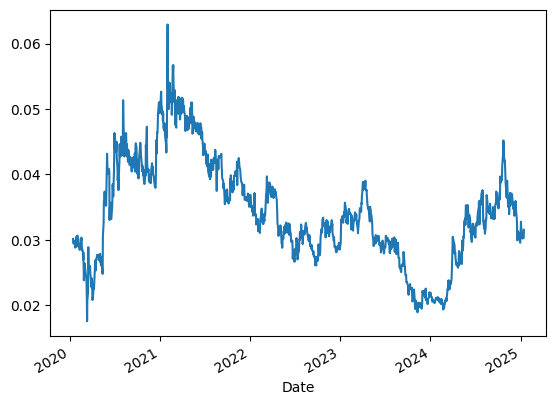

In [33]:
(df['ASM'] / df['SI=F']).plot()